<center>
МІНІСТЕРСТВО ОСВІТИ І НАУКИ УКРАЇНИ

НАЦІОНАЛЬНИЙ ТЕХНІЧНИЙ УНІВЕРСИТЕТ УКРАЇНИ

«КИЇВСЬКИЙ ПОЛІТЕХНІЧНИЙ ІНСТИТУТ
імені ІГОРЯ СІКОРСЬКОГО»

Навчально-науковий інститут прикладного системного аналізу
Кафедра штучного інтелекту


Звіт

про виконання лабораторної роботи №4

з дисципліни «Інтелектуальний аналіз даних»



Виконали:

студенти III курсу, груп КІ-33 та КІ-31
Тал Майк, Піддубна Марія, Владислав Дмитренко

Прийняв:
Викладач: Андросов Д.В.







Київ – 2025
</center>

# Практикум №4: Побудова та оцінювання якості моделей кластеризацiї з використанням Scikit-Learn Python

## Хiд виконання роботи:

1. Представити початковi данi графiчно.
2. Побудувати модель кластеризацiї згiдно з варiантом.
3. Виконати кластеризацiю даних на основi моделi.
4. Представити розбиття на кластери графiчно, наприклад, рiзними кольорами.
5. Розрахувати час кластеризацiї. Оцiнити швидкодiю методу на надвеликих наборах даних (наприклад, при збiльшеннi кiлькостi точок даних до ста тисяч i бiльше).
6. Побудувати кiлька альтернативних моделей:
- шляхом змiни значень параметрiв основної моделi,
- використати рiзнi функцiї вiдстанi в алгоритмах, де це можна зробити, задати рiзнi значення кiлькостi кластерiв, в алгоритмах де кiлькiсть
кластерiв - параметр.
7. Для кожної альтернативної моделi розрахувати метрики якостi кластеризацiї, що реалiзованi в модулi sklearn.metrics (тiльки метрики згiдно з варiантом):
- Estimated Number of Clusters.
- Adjusted Rand Index.
- Adjusted Mutual Information.
- Homogeneity.
- Completeness.
- V-measure.
- Silhouette Coefficient.
- Calinski-Harabasz Index.
- Davies-Bouldin index.
- Contingency Matrix.
8. Виконати аналiз результатiв кластеризацiї одним з неформальних методiв (тiльки методом згiдно з варiантом):
- чи є розбиття стабiльним на пiдвибiрках даних,
- чи є розбиття стабiльним пiсля видалення окремих об’єктiв,
- чи є розбиття стабiльним пiсля змiни порядку об’єктiв у множинi об’єктiв,
- чи iснує взаємозв’язок мiж результатами кластеризацiї i змiнними, якi не враховувалися при кластеризацiї,
- чи можна iнтерпретувати результати кластеризацiї.
9. Вищенаведенi пункти виконати для заданих двох наборiв даних рiзної форми.
10. Зробити висновки про якiсть роботи моделей на дослiджених даних та про швидкодiю методу.
11. Оцiнити результати кластеризацiї на основi метрик якостi та на основi неформальних методiв. У кожному варiантi задано два набори даних. Спробувати пiдiбрати найкращу модель кластеризацiї для кожного набору даних.

## Умова завдання:

14. Агломеративний алгоритм AgglomerativeClustering. Дослiдити методи розрахунку вiдстанi мiж кластерами: ward, single, average, complete.
    Метрики якостi: Estimated number of clusters, Adjusted Rand Index, V-measure. Побудувати матрицi вiдстаней мiж кластерами, використовую-чи metrics.pairwise_distances.
    Чи є розбиття стабiльним пiсля вилучення окремих об’єктiв?

    **Початковi данi:**

    (а) sklearn.datasets.make_moons

    (б) from sklearn.datasets.samples_generator import make_blobs

    X1, y_true = make_blobs (n_samples=10000, centers=4, cluster_std=0.60, random_state=0)

    rng = np.random.RandomState(13)

    X = np.dot(X1, rng.randn(2, 2))

---

## Імпорт бібліотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons, make_blobs

from sklearn.cluster import AgglomerativeClustering

plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10
sns.set_style("whitegrid")

## Завантаження даних

In [22]:
# Датасет (а) - make_moons
X_moons, y_moons = make_moons(n_samples=1000, noise=0.1, random_state=42)

# Датасет (б) - make_blobs (трансформований)
np.random.seed(0)
X1, y_true = make_blobs(n_samples=10000, centers=4,
                        cluster_std=0.60, random_state=0)
rng = np.random.RandomState(13)
X_blobs = np.dot(X1, rng.randn(2, 2))

print("Датасети завантажені:")
print(f"  make_moons: {X_moons.shape[0]} об'єктів, {X_moons.shape[1]} ознаки, {len(np.unique(y_moons))} класи")
print(f"  make_blobs: {X_blobs.shape[0]} об'єктів, {X_blobs.shape[1]} ознаки, {len(np.unique(y_true))} класів")

Датасети завантажені:
  make_moons: 1000 об'єктів, 2 ознаки, 2 класи
  make_blobs: 10000 об'єктів, 2 ознаки, 4 класів


За умовою використовуємо два синтетичні датасети: make_moons, що генерує дані у формі двох півмісяців, та make_blobs, що створює чотири кластери, які потім трансформуються матричним множенням для отримання еліптичної форми замість круглої.

Для першого датасета було задано стандартні параметри для створення 1000 точок з невеликим шумом, для другого датасета було задано параметри згідно з умовою варіанту 14.

## Завдання 1: Візуалізація початкових даних

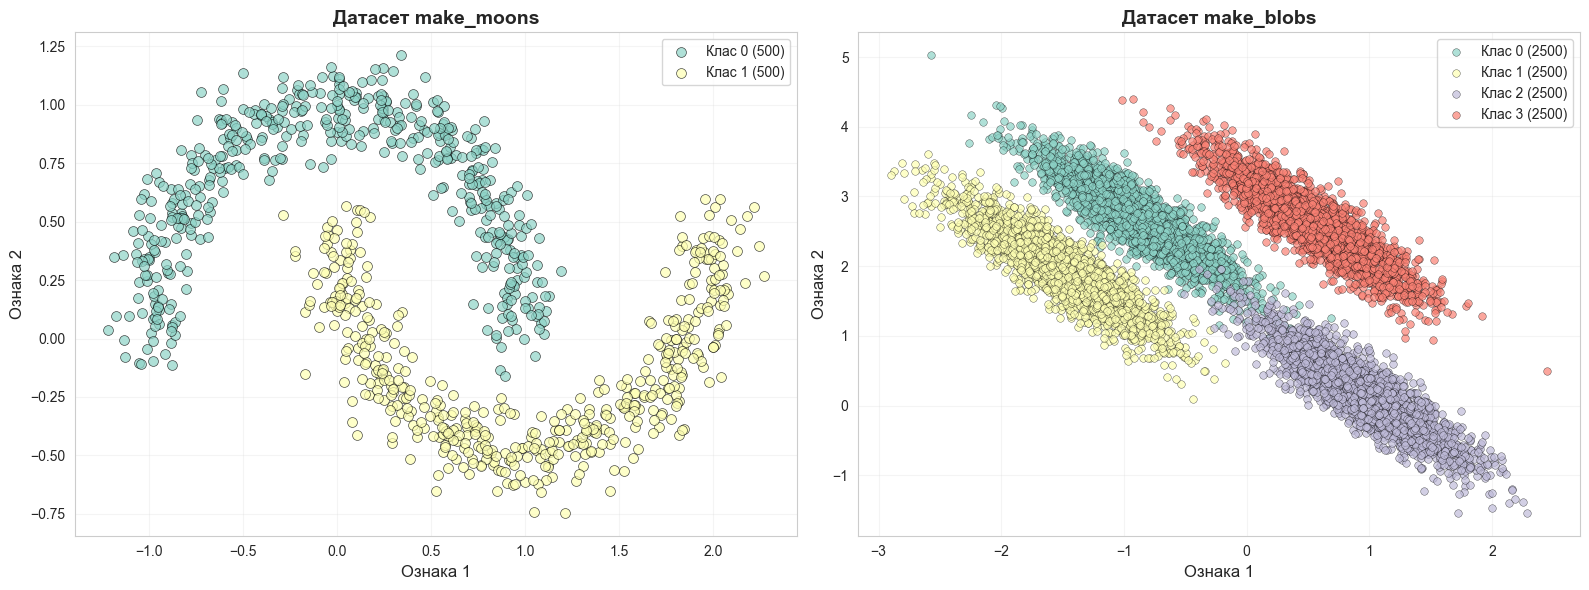

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Датасет make_moons
for label in np.unique(y_moons):
    mask = y_moons == label
    count = np.sum(mask)
    axes[0].scatter(X_moons[mask, 0], X_moons[mask, 1],
                   label=f'Клас {label} ({count})',
                   alpha=0.7, s=50, edgecolors='k', linewidth=0.5)
axes[0].set_title('Датасет make_moons', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Ознака 1', fontsize=12)
axes[0].set_ylabel('Ознака 2', fontsize=12)
axes[0].grid(True, alpha=0.2)
axes[0].legend()

# Датасет make_blobs
for label in np.unique(y_true):
    mask = y_true == label
    count = np.sum(mask)
    axes[1].scatter(X_blobs[mask, 0], X_blobs[mask, 1],
                   label=f'Клас {label} ({count})',
                   alpha=0.7, s=30, edgecolors='k', linewidth=0.3)
axes[1].set_title('Датасет make_blobs', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Ознака 1', fontsize=12)
axes[1].set_ylabel('Ознака 2', fontsize=12)
axes[1].grid(True, alpha=0.2)
axes[1].legend()

plt.tight_layout()
plt.show()

На графіках зображено структуру обох датасетів зі справжніми мітками класів. Датасет make_moons складається з двох класів у формі півмісяців, які огортають один одного. Датасет make_blobs показує чотири еліптичні кластери після трансформації, які частково перекриваються особливо в центральній області.

Ці мітки класів будуть використані далі для обчислення метрик якості кластеризації (Adjusted Rand Index та V-measure), але важливо зазначити, що сам алгоритм AgglomerativeClustering під час роботи ці кольори не бачить і повинен сам знайти структуру даних лише за координатами точок.

## Завдання 2: Побудова моделей кластеризації

In [38]:
# Методи обчислення відстані між кластерами
linkage_methods = ['ward', 'single', 'average', 'complete']

# Побудова моделей для датасету make_moons
models_moons = {
    method: AgglomerativeClustering(n_clusters=2, linkage=method)
    for method in linkage_methods
}

# Побудова моделей для датасету make_blobs
models_blobs = {
    method: AgglomerativeClustering(n_clusters=4, linkage=method)
    for method in linkage_methods
}

Створено вісім моделей агломеративної кластеризації для тестування чотирьох різних методів обчислення відстані між кластерами (ward, single, average та complete).

Кількість кластерів встановлено відповідно до кількості справжніх класів у кожному датасеті.

## Завдання 3: Кластеризацiя даних на основi моделей

In [39]:
# Кластеризація датасету make_moons
labels_moons = {
    method: models_moons[method].fit_predict(X_moons)
    for method in linkage_methods
}

# Кластеризація датасету make_blobs
labels_blobs = {
    method: models_blobs[method].fit_predict(X_blobs)
    for method in linkage_methods
}

Виконана кластеризація даних методом fit_predict, який навчає модель і одразу повертає мітки кластерів для кожної точки.

Як і було зазначено раніше, під час кластеризації не використовувались справжні мітки класів y_moons та y_true. Алгоритм бачив тільки координати точок X_moons та X_blobs і на їх основі самостійно визначив приналежність кожної точки до кластеру.

## Завдання 4: Візуалізація розбиття на кластери

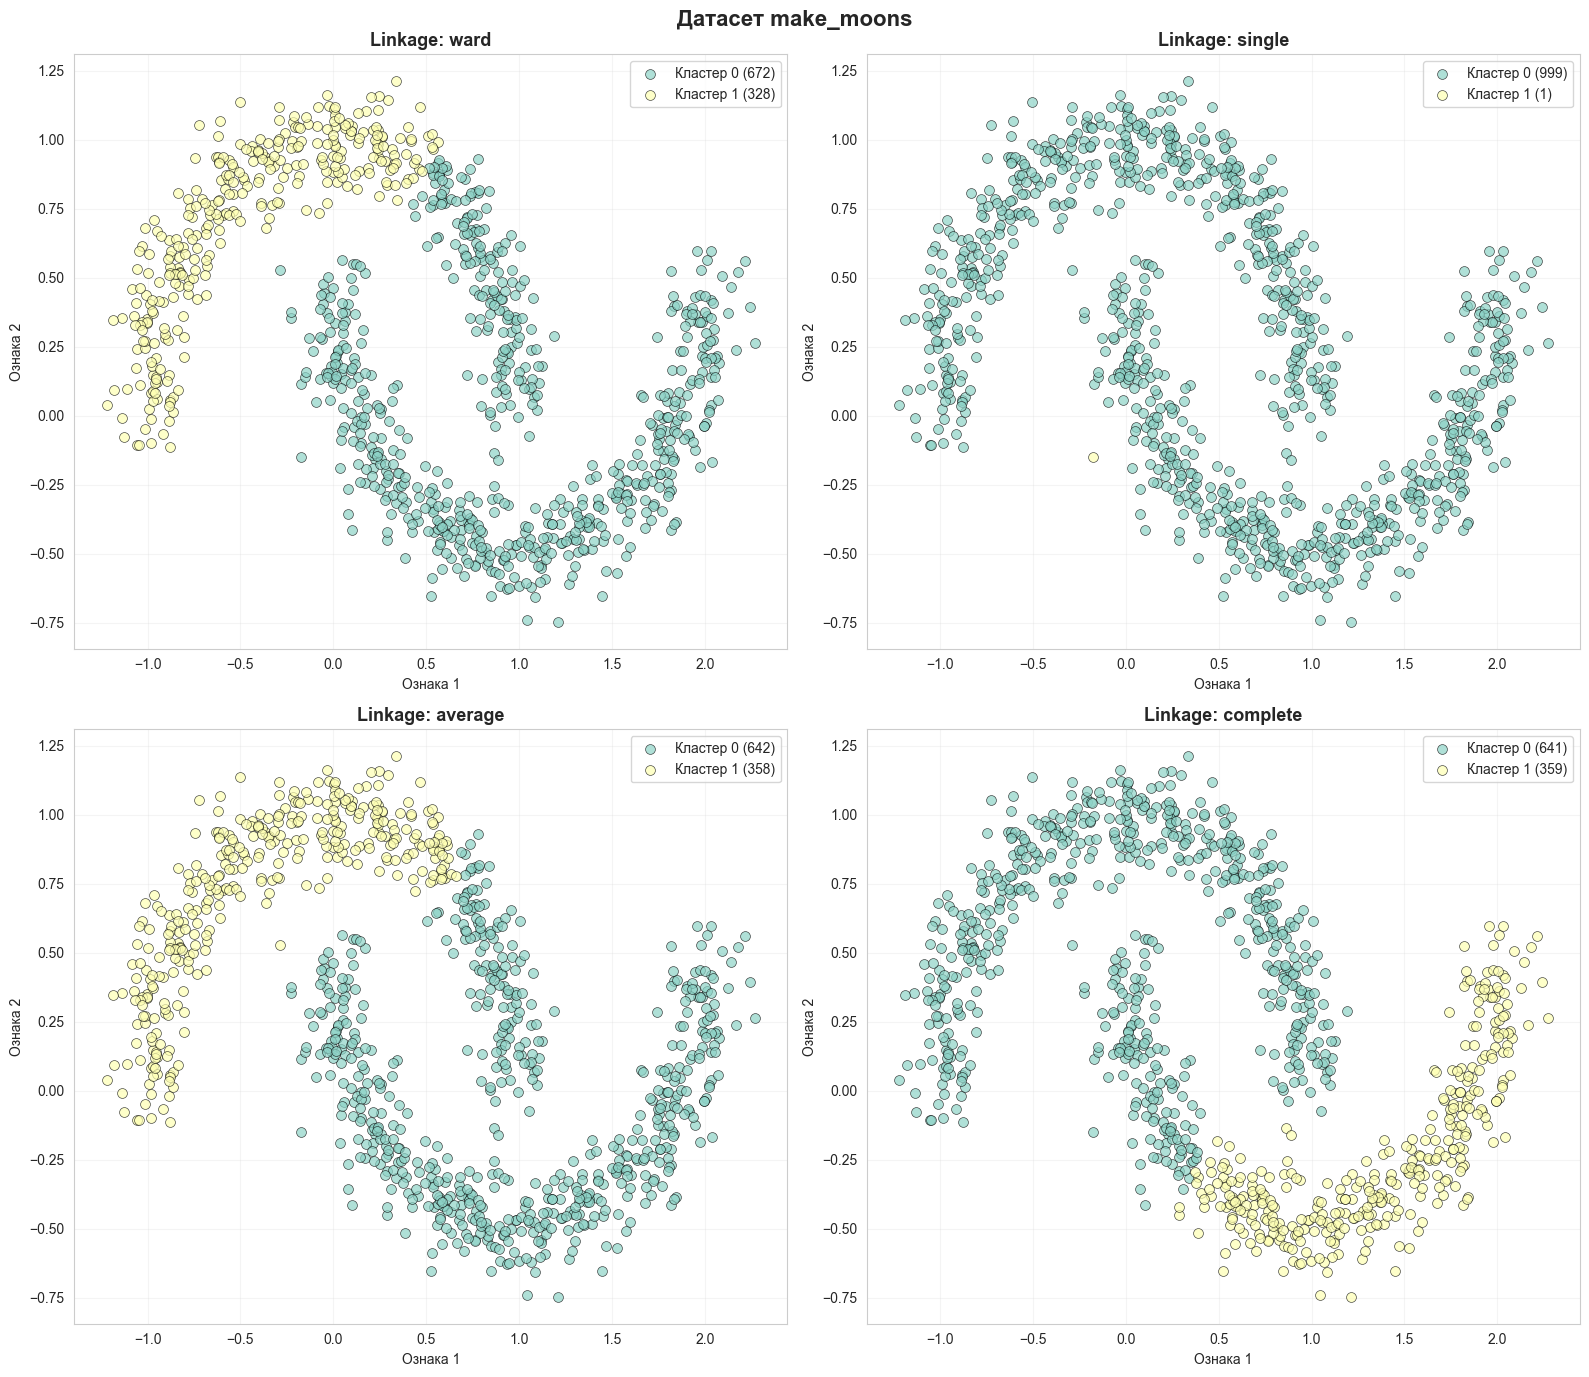

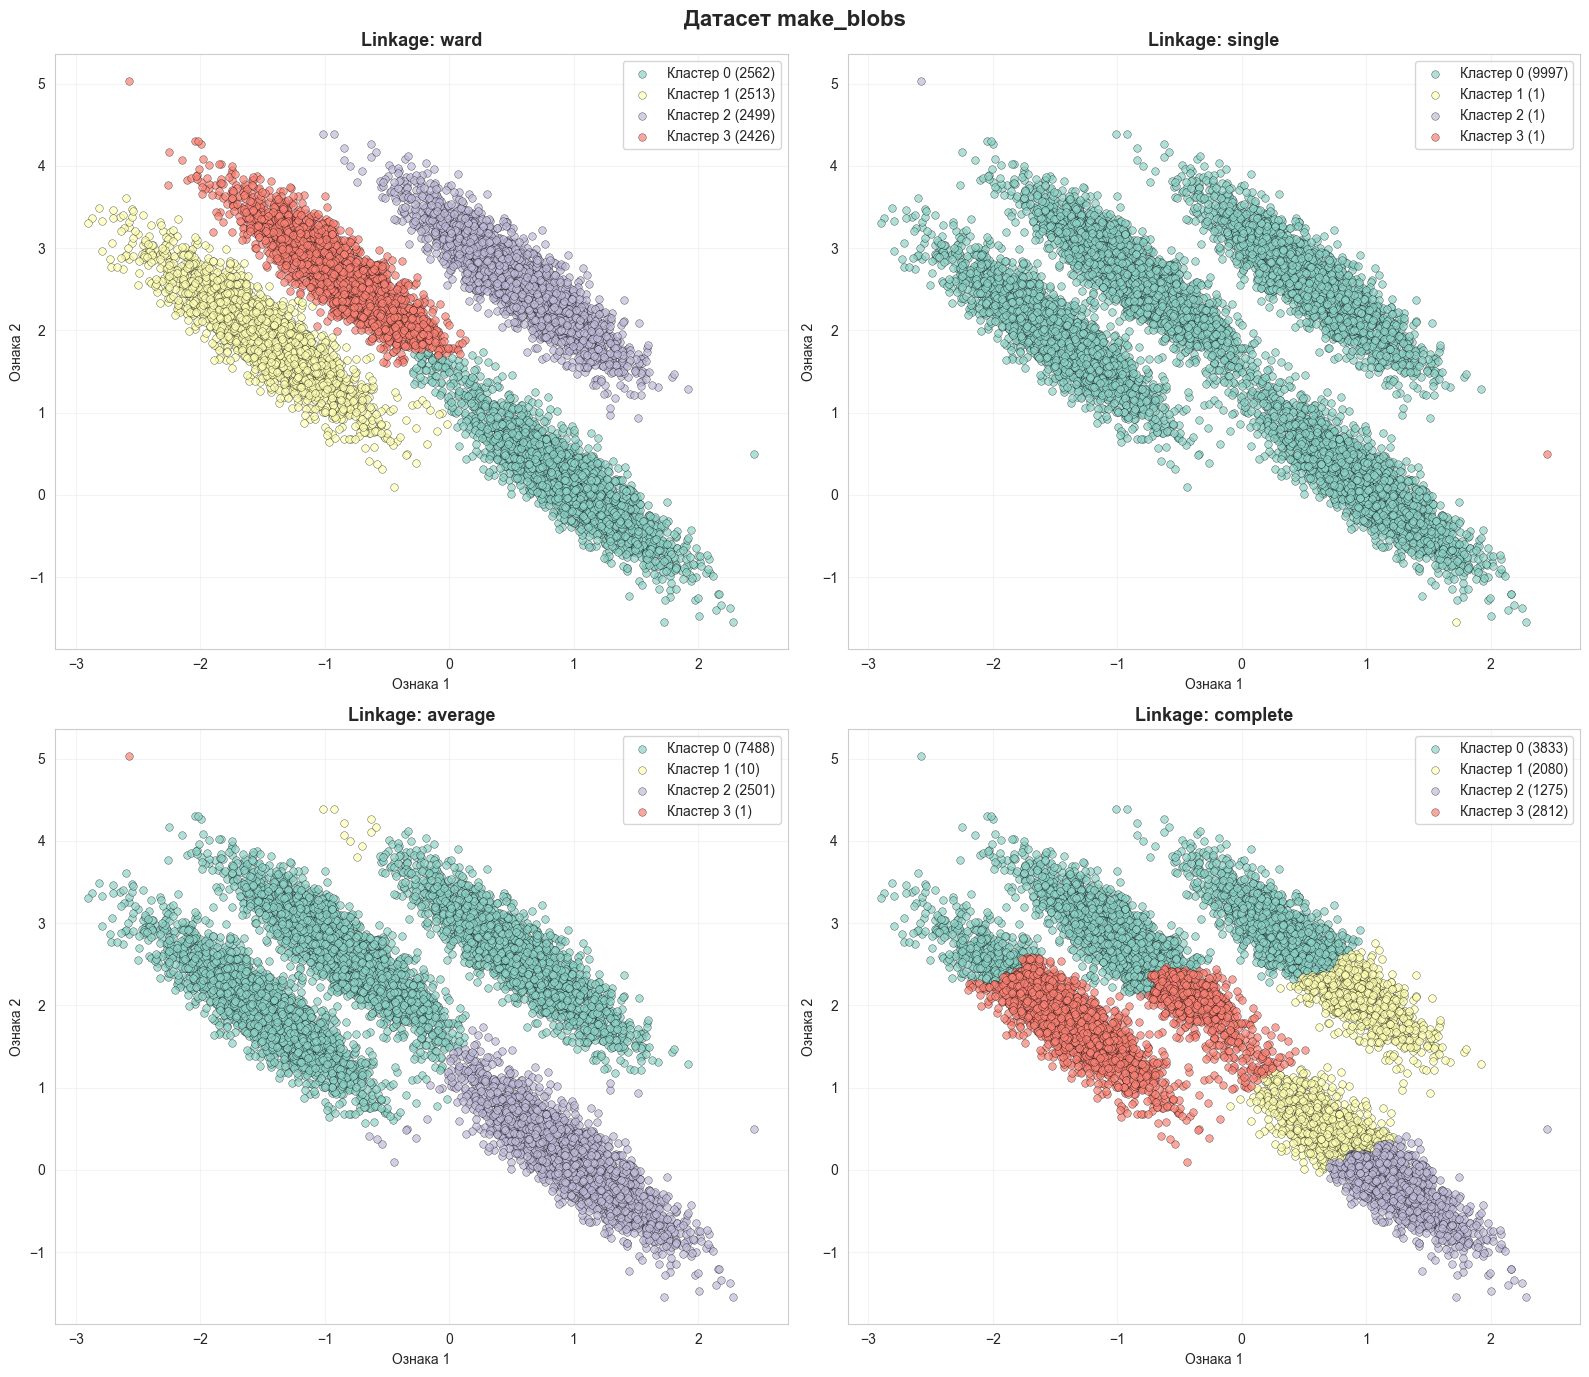

In [40]:
# Датасет make_moons
fig, axes = plt.subplots(2, 2, figsize=(16, 14))
fig.suptitle('Датасет make_moons', fontsize=16, fontweight='bold')

# Ward
for label in np.unique(labels_moons_ward):
    mask = labels_moons_ward == label
    count = np.sum(mask)
    axes[0, 0].scatter(X_moons[mask, 0], X_moons[mask, 1],
                      label=f'Кластер {label} ({count})',
                      alpha=0.7, s=50, edgecolors='k', linewidth=0.5)
axes[0, 0].set_title('Linkage: ward', fontsize=13, fontweight='bold')
axes[0, 0].set_xlabel('Ознака 1')
axes[0, 0].set_ylabel('Ознака 2')
axes[0, 0].grid(True, alpha=0.2)
axes[0, 0].legend()

# Single
for label in np.unique(labels_moons_single):
    mask = labels_moons_single == label
    count = np.sum(mask)
    axes[0, 1].scatter(X_moons[mask, 0], X_moons[mask, 1],
                      label=f'Кластер {label} ({count})',
                      alpha=0.7, s=50, edgecolors='k', linewidth=0.5)
axes[0, 1].set_title('Linkage: single', fontsize=13, fontweight='bold')
axes[0, 1].set_xlabel('Ознака 1')
axes[0, 1].set_ylabel('Ознака 2')
axes[0, 1].grid(True, alpha=0.2)
axes[0, 1].legend()

# Average
for label in np.unique(labels_moons_average):
    mask = labels_moons_average == label
    count = np.sum(mask)
    axes[1, 0].scatter(X_moons[mask, 0], X_moons[mask, 1],
                      label=f'Кластер {label} ({count})',
                      alpha=0.7, s=50, edgecolors='k', linewidth=0.5)
axes[1, 0].set_title('Linkage: average', fontsize=13, fontweight='bold')
axes[1, 0].set_xlabel('Ознака 1')
axes[1, 0].set_ylabel('Ознака 2')
axes[1, 0].grid(True, alpha=0.2)
axes[1, 0].legend()

# Complete
for label in np.unique(labels_moons_complete):
    mask = labels_moons_complete == label
    count = np.sum(mask)
    axes[1, 1].scatter(X_moons[mask, 0], X_moons[mask, 1],
                      label=f'Кластер {label} ({count})',
                      alpha=0.7, s=50, edgecolors='k', linewidth=0.5)
axes[1, 1].set_title('Linkage: complete', fontsize=13, fontweight='bold')
axes[1, 1].set_xlabel('Ознака 1')
axes[1, 1].set_ylabel('Ознака 2')
axes[1, 1].grid(True, alpha=0.2)
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# Датасет make_blobs
fig, axes = plt.subplots(2, 2, figsize=(16, 14))
fig.suptitle('Датасет make_blobs', fontsize=16, fontweight='bold')

# Ward
for label in np.unique(labels_blobs_ward):
    mask = labels_blobs_ward == label
    count = np.sum(mask)
    axes[0, 0].scatter(X_blobs[mask, 0], X_blobs[mask, 1],
                      label=f'Кластер {label} ({count})',
                      alpha=0.7, s=30, edgecolors='k', linewidth=0.3)
axes[0, 0].set_title('Linkage: ward', fontsize=13, fontweight='bold')
axes[0, 0].set_xlabel('Ознака 1')
axes[0, 0].set_ylabel('Ознака 2')
axes[0, 0].grid(True, alpha=0.2)
axes[0, 0].legend()

# Single
for label in np.unique(labels_blobs_single):
    mask = labels_blobs_single == label
    count = np.sum(mask)
    axes[0, 1].scatter(X_blobs[mask, 0], X_blobs[mask, 1],
                      label=f'Кластер {label} ({count})',
                      alpha=0.7, s=30, edgecolors='k', linewidth=0.3)
axes[0, 1].set_title('Linkage: single', fontsize=13, fontweight='bold')
axes[0, 1].set_xlabel('Ознака 1')
axes[0, 1].set_ylabel('Ознака 2')
axes[0, 1].grid(True, alpha=0.2)
axes[0, 1].legend()

# Average
for label in np.unique(labels_blobs_average):
    mask = labels_blobs_average == label
    count = np.sum(mask)
    axes[1, 0].scatter(X_blobs[mask, 0], X_blobs[mask, 1],
                      label=f'Кластер {label} ({count})',
                      alpha=0.7, s=30, edgecolors='k', linewidth=0.3)
axes[1, 0].set_title('Linkage: average', fontsize=13, fontweight='bold')
axes[1, 0].set_xlabel('Ознака 1')
axes[1, 0].set_ylabel('Ознака 2')
axes[1, 0].grid(True, alpha=0.2)
axes[1, 0].legend()

# Complete
for label in np.unique(labels_blobs_complete):
    mask = labels_blobs_complete == label
    count = np.sum(mask)
    axes[1, 1].scatter(X_blobs[mask, 0], X_blobs[mask, 1],
                      label=f'Кластер {label} ({count})',
                      alpha=0.7, s=30, edgecolors='k', linewidth=0.3)
axes[1, 1].set_title('Linkage: complete', fontsize=13, fontweight='bold')
axes[1, 1].set_xlabel('Ознака 1')
axes[1, 1].set_ylabel('Ознака 2')
axes[1, 1].grid(True, alpha=0.2)
axes[1, 1].legend()

plt.tight_layout()
plt.show()

### Висновки

**Датасет make_moons:**
- **Ward (672/328):** Розділив дані вертикально замість поділу за формою півмісяців. Метод ward мінімізує внутрішньокластерну дисперсію, тому намагається створити компактні сферичні кластери, що призводить до неправильного розбиття криволінійних структур.
- **Single (999/1):** Алгоритм послідовно об'єднував кластери на основі найближчих точок (ефект ланцюга), що призвело до злиття обох півмісяців в один великий кластер, залишивши одну ізольовану точку-викид.
- **Average (642/358):** Найкращий результат для цього датасету. Використання середньої відстані між усіма парами точок дозволило частково розпізнати криволінійну структуру і створити більш адекватний розподіл, хоча й не ідеально збалансований.
- **Complete (641/359):** Результат дуже близький до average. Використання максимальної відстані між найвіддаленішими точками допомогло уникнути ефекту ланцюга і створити компактніші кластери, що краще відповідає структурі даних порівняно з ward.

Отже, методи average та complete продемонстрували найкращу здатність розпізнавати криволінійні структури завдяки використанню агрегованих відстаней між точками, тоді як ward та single виявились неефективними - ward через орієнтацію на сферичні кластери, а single через критичну схильність до ефекту ланцюга.

**Датасет make_blobs:**
- **Ward (2562/2513/2499/2426):** Найкращий результат з майже ідеальним рівномірним розподілом. Мінімізація дисперсії всередині кластерів дозволила ward точно розпізнати структуру даних навіть після лінійної трансформації, яка перетворила круглі кластери на еліптичні.
- **Single (9997/1/1/1):** Аналогічно, спрацював ефект ланцюга, що призвело до злиття обох півмісяців в один великий кластер, залишивши три ізольовані точки-викиди.
- **Average (7488/10/2501/1):** Сильно незбалансована кластеризація показує що метод частково піддався ефекту ланцюга. Один кластер правильно виділений, але три інші або злились в один великий, або залишились майже порожніми через складність визначення середньої відстані в зоні перекриття.
- **Complete (3833/2080/1275/2812):** Усі чотири кластери коректно ідентифіковані, але з нерівномірними розмірами через використання максимальної відстані між точками. Метод створив більш компактні кластери ніж необхідно, що призвело до неправильного розподілу точок у зонах перекриття.

Отже, метод ward показав найкращу ефективність для даних з компактною еліптичною структурою, тоді як complete забезпечив прийнятний але менш точний результат. Single та average виявились повністю непридатними для цього типу даних через ефект ланцюга та неспроможність коректно обробляти зони перекриття кластерів.

---